# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [4,5,20]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  22615  5410     7198    3915              1777          5185
1   9413  8259     5126     666              1795          1451
2  17546  4519     4602    1066              2259          2124

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
1. Sample 0 may represent a retailer because it has everything in bulk quantities so it wants to sell items.
2. Sample 1 may represent a cafe because the milk consumption is relatively higher than average.
3. Sample 2 may represent a restraunt because the fresh and milk items they consume are well above the average.
 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop("Grocery",axis=1)
#print data["Milk"]
# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test =train_test_split (new_data,data['Grocery'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print score


0.681884008544


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I tried to predict the feature Grocery .The prediction score is 0.681884008544.
Not much because it can be identified based on other features as it can be derived from other features to a good extent.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

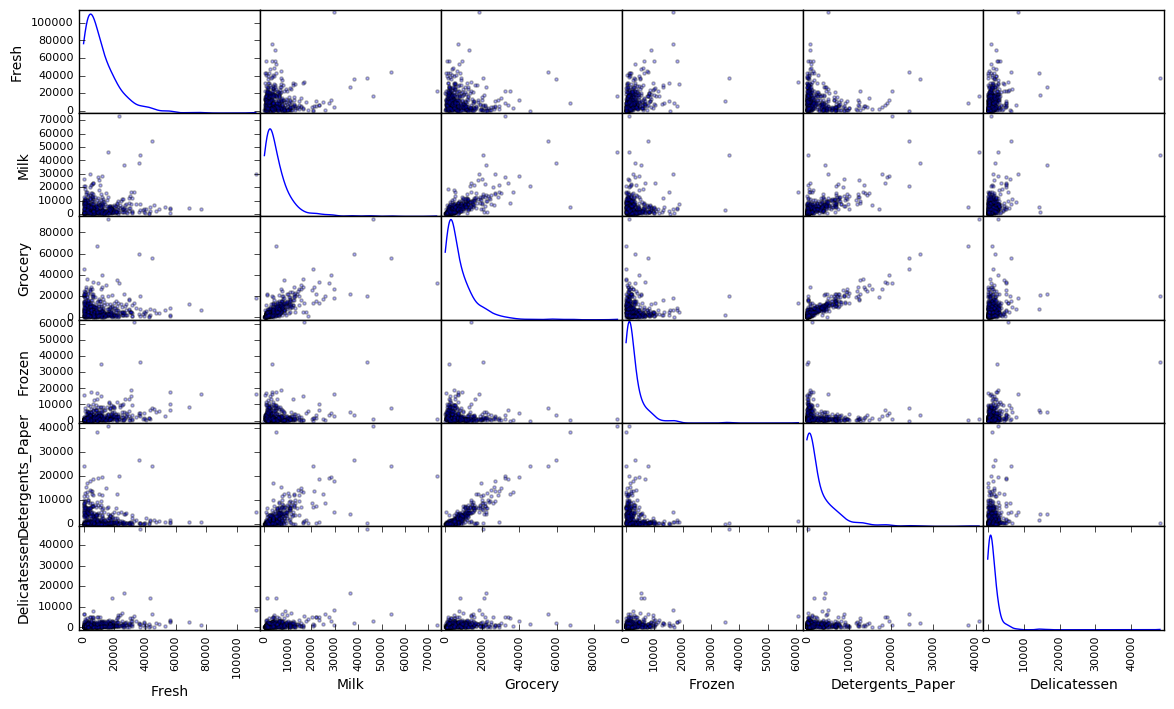

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Grocery and Detergents_paper are the two features whose plot shows that their values kind of increase together and therefore they are correlated.This confirms that my feature is relevant because its orthogonal in the statistical sense its highly uncorrelated to any of other features so its not expendable.

If we see it all features against milk we get a little sense of correlation with it against grocery and Detegents_Paper but shows discreteness against others.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

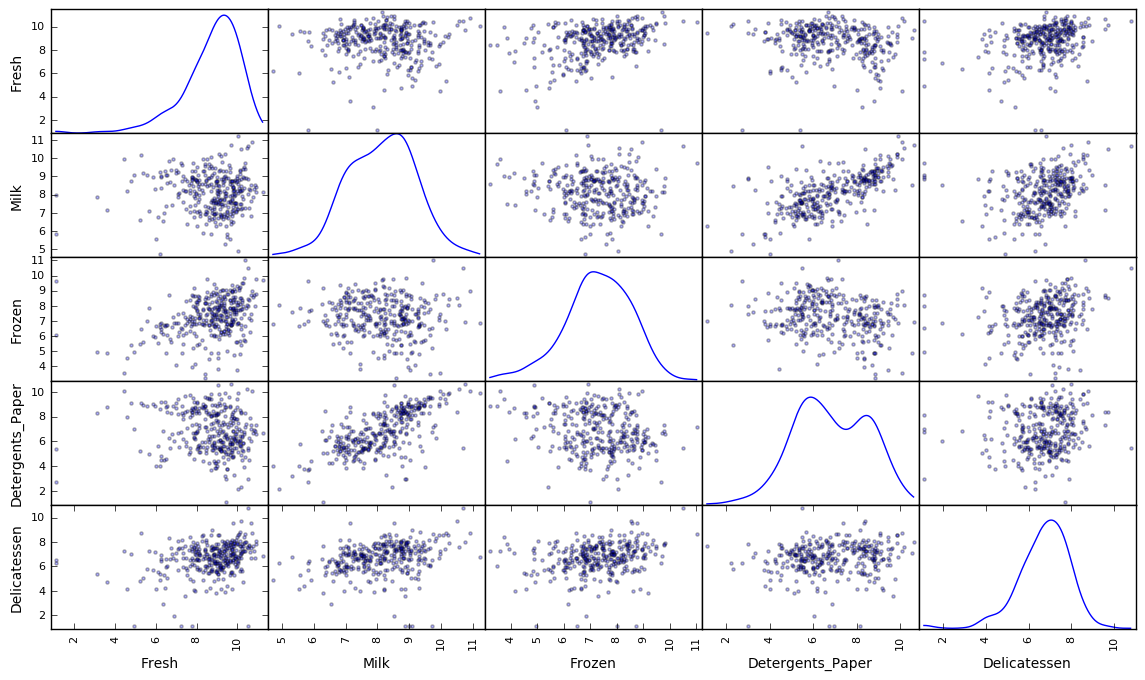

In [12]:
# TODO: Scale the data using the natural logarithm

log_data = np.log(X_train.reset_index(drop=True))

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(X_test.reset_index(drop=True))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk    Frozen  Detergents_Paper  Delicatessen
0     8.684232  10.065904  9.225721          6.721426      8.198639
1     9.284148   7.069023  7.647786          5.707110      5.117994
2    10.217568   8.879612  7.940584          8.438366      6.929517
3    10.361355   6.192362  8.083946          4.709530      6.421622
4     6.295266   6.801283  6.025866          4.477337      6.257668
5     8.703175   8.117909  7.826842          5.356586      6.530878
6     5.789960   6.822197  4.304065          5.811141      2.397895
7     9.245901   9.130431  6.602588          8.171034      7.758761
8     9.238928   7.591357  6.945051          5.123964      7.661527
9     8.836955   6.952729  7.634821          6.385194      5.934894
10    8.304495   7.698029  7.734559          5.572154      6.535241
11    9.923192   7.036148  8.390949          1.098612      6.882437
12    2.890372   8.923191  7.158514          8.475746      8.759669
13    9.353141   7.418181  8.830251          4.158883      6.610696
14    5.541264   8.658345  5.855072          8.432724      7.191429
15    6.575076   8.185071  8.926650          6.270988      6.795706
16    9.725019   8.274357  6.533789          7.771067      6.731018
17    5.192957   8.156223  6.865891          8.633731      6.501290
18    9.898425   8.581482  9.003562          6.638568      6.473891
19    6.432940   4.007333  4.317488          1.945910      2.079442
20    8.700514   9.314070  7.055313          8.912608      7.648740
21   10.728540   8.847647  8.904902          7.334329      5.438079
22    9.842410   8.191463  7.045777          7.665753      7.993958
23    8.614138   7.286876  6.304449          5.231109      6.013715
24    9.553930   7.664816  7.197435          7.307202      6.306275
25    9.609318   7.616776  6.356108          6.861711      5.793014
26    9.723463   7.619233  9.272658          4.753590      7.218910
27    9.599337   6.801283  7.475906          4.025352      6.618739
28    9.327501   7.786552  9.638740          4.682131      7.542213
29    8.568646   8.211483  6.963190          7.612831      7.029973
..         ...        ...       ...               ...           ...
80    9.092120   7.794823  7.482682          6.063785      6.413459
81    9.321255   7.832411  7.324490          5.736572      5.402677
82   10.342130   9.722385  9.621257          6.084499      7.058758
83    8.597297   9.203618  3.637586          8.932213      7.156177
84    8.034955   8.997147  6.493754          6.580639      3.583519
85   10.027783   9.187686  7.977625          8.407825      8.661813
86    8.678632   8.725345  6.732211          5.913503      8.406932
87    2.197225   7.335634  5.164786          8.151333      3.295837
88    6.349139   9.186355  7.705713          8.493310      7.848934
89    9.965194   7.607381  6.812345          6.698268      7.525101
90    7.867871   8.375399  7.643962          6.709304      6.892642
91    9.381517   8.109826  7.071573          8.252446      4.787492
92    8.572249   9.496722  7.500529          9.077038      5.147494
93    8.399760   6.809039  8.182000          5.030438      6.921658
94    8.635154   9.410829  5.327876          8.524764      5.497168
95    9.018817   8.263590  7.406103          7.912057      5.840642
96    9.051696   8.613594  9.509407          7.227662      7.311886
97    8.149891   9.132379  6.658011          5.710427      7.394493
98    9.169727   7.182352  7.979681          6.734592      5.669881
99    8.667164   6.599870  7.239215          4.369448      6.061457
100   9.856763   7.173192  8.021256          6.565265      6.800170
101   9.149847   9.019059  6.501290          7.492760      7.280008
102   8.552753  10.000796  7.461640          8.902864      8.514189
103   9.744668   8.486115  6.938284          8.135933      7.486613
104   8.038189   8.349957  6.354370          5.484797      7.640123
105   8.078688   8.099858  5.641907          4.219508      7.015712
106   8.530109   8.612322  5.897154          8.156223      6.9688

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
# For each feature find the data points with extreme high or low values
outliers=[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    df= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    ls=df.index.tolist()
    for i in range(len(ls)):
        outliers.append(ls[i])
# OPTIONAL: Select the indices for data points you wish to remove

print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers],axis=0).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Frozen  Detergents_Paper  Delicatessen
77   5.389072   9.163249  5.645447          8.964184      5.049856
81   4.574711   8.190077  4.584967          7.996317      4.127134
98   3.135494   7.869402  4.976734          8.262043      5.379897
103  3.610918   7.150701  4.919981          8.816853      4.700480
164  4.762174   8.742574  5.429346          9.069007      7.013016
168  1.098612   5.808142  9.655090          2.708050      6.309918
173  4.442651   9.950323  3.583519         10.095388      7.260523
187  1.098612   7.979339  6.086775          5.407172      6.563856
206  5.298317  10.160530  6.478510          9.079434      8.740337
226  4.941642   9.087834  4.955827          6.967909      1.098612
235  5.247024   6.588926  5.501258          5.214936      4.844187

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Frozen  Detergents_Paper  Delicatessen
5    10.029503   4.897840  8.057377          2.197225      6.306275
126  10.039983  11.205013  6.894670          9.906981      6.805723
207   6.220590   4.718499  6.796824          4.025352      4.882802

Data points considered outliers for the feature 'Frozen':


Fresh      Milk     Frozen  Detergents_Paper  Delicatessen
26   10.395650  9.728181  11.016479          7.148346      8.632128
38   10.000569  9.034080   3.737670          9.440738      8.396155
41    7.759187  8.967632   3.951244          8.341887      7.436617
116   8.402007  8.569026   3.218876          8.827321      7.239215
140   8.431853  9.663261   3.496508          8.847360      6.070738
173   4.442651  9.950323   3.583519         10.095388      7.260523
246   9.060331  7.467371   3.850148          4.430817      7.824446
272   6.978214  9.177714   4.110874          8.696176      7.142827
321   7.932721  7.437206   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk    Frozen  Detergents_Paper  Delicatessen
252  9.42819  6.291569  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk     Frozen  Detergents_Paper  Delicatessen
36    7.248504   9.724899   6.511745          6.728629      1.098612
39    6.368187   6.529419   6.150603          6.860664      2.890372
134  10.514529  10.690808  10.505999          5.476464     10.777768
153   6.871091   8.513988   6.842683          6.013715      1.945910
183  10.519646   8.875147   8.004700          2.995732      1.098612
226   4.941642   9.087834   4.955827          6.967909      1.098612
293   7.798933   8.987447   8.743372          8.148735      1.098612
308   7.431892   8.848509   7.283448          9.646593      3.610918

[77, 81, 98, 103, 164, 168, 173, 187, 206, 226, 235, 5, 126, 207, 26, 38, 41, 116, 140, 173, 246, 272, 321, 252, 36, 39, 134, 153, 183, 226, 293, 308]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
The following data points were considered outliers :
```
[77, 81, 98, 103, 164, 168, 173, 187, 206, 226, 235, 26, 38, 41, 116, 140, 173, 246, 272, 321, 252, 36, 39, 134, 153, 183, 226, 293, 308]
```
Yes these data points must be removed from the data set.I removed them because they skew the result.They sway the mean and standard deviation towards extreme ends.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

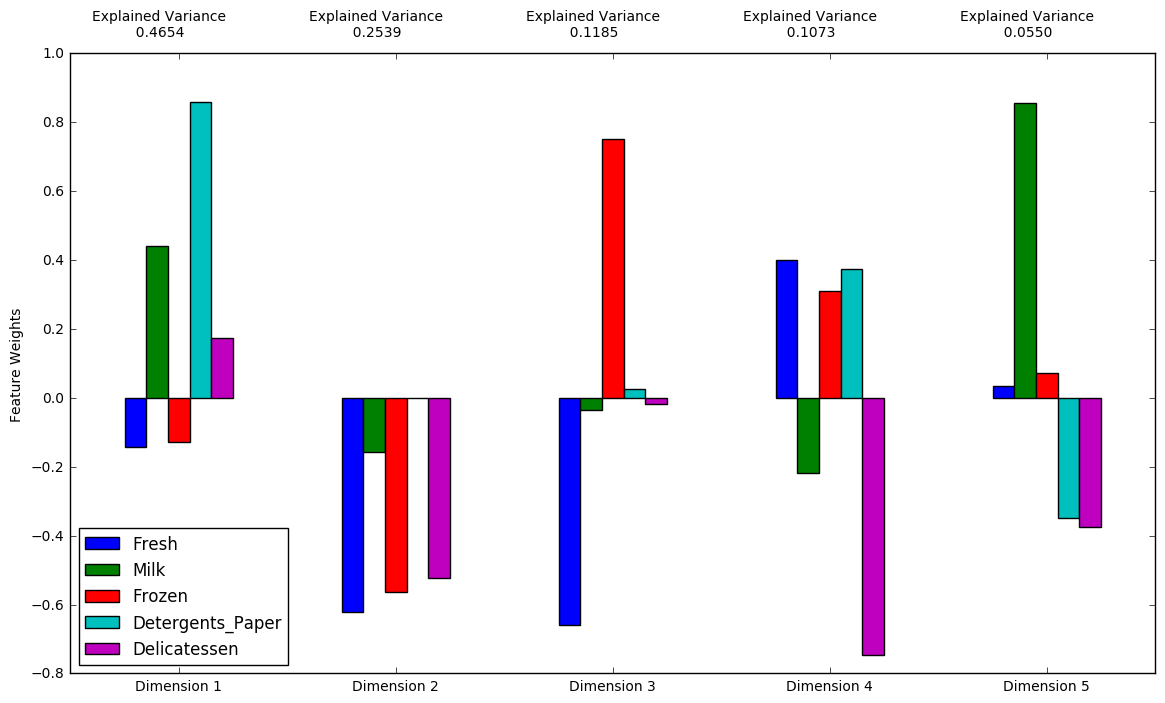

In [15]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Variance explained in total by first and second is 0.7193.Total variance explained by the first four components is 0.9451.
Detergents_Paper is a very useful feature because we see its contribution to a high correlation and variance ratio its spread along dimension is high.The second dimension graph shows that the PC2 has points that are negatively correlated but have high variance ratio i.e they spread nicely along PC2 Its feels like PC2 are people who do not spend at all.PC3 shows that people who buy fresh are negatively correlated to those who buy frozen that is one who eats fresh doesn't like frozen.I think PC4 shows vegetarian people because they do not like Delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5
0         0.8293      -1.9112       1.4206      -1.0312       1.3158
1        -1.7854       0.6821      -0.0253       1.2865       0.1644
2         1.5046      -1.2946      -0.4484       1.0306       0.1376
3        -3.0126      -0.7744      -0.4214       0.6946      -0.6596
4        -2.1266       2.9020       0.6840      -1.6627      -0.2846
5        -1.3171       0.0416       0.4217      -0.3030       0.6471
6        -1.3504       6.1942      -0.1805       0.9776       0.5742
7         1.8404      -0.4085      -0.8436      -0.5455       0.0031
8        -1.5164      -0.3015      -0.5992      -1.1795      -0.1933
9        -1.0467       0.5584       0.2664       0.7744      -0.4932
10       -1.2479       0.4044       0.6351      -0.3219       0.1911
11       -5.6377      -1.0427      -0.0286      -1.2674       1.1521
12        3.0219       2.7370       3.7558      -3.4956      -0.8291
13       -2.8626      -0.8581       0.7423      -0.0898       0.5303
14        2.3832       2.6838       1.0663      -1.6312      -0.4587
15       -0.2928       0.5943       2.6644      -0.6796       0.2964
16        0.8802       0.0031      -1.1724       0.4266      -0.1937
17        2.1342       2.7690       2.0896      -0.7572      -0.6368
18       -0.3428      -1.4085       0.5347       0.9620       0.7462
19       -6.0628       6.3988      -0.5816       0.6355      -0.3486
20        2.5593      -0.2970      -0.1310      -0.3020      -0.0414
21        0.0861      -1.3710      -0.0610       2.2388       1.1415
22        0.8905      -1.0039      -0.8858      -0.3315      -0.6603
23       -1.6742       1.3546      -0.6280      -0.2917       0.0590
24        0.0780       0.0530      -0.5435       0.8393      -0.3517
25       -0.3152       0.7685      -1.2126       0.8265      -0.1053
26       -2.2668      -1.6870       0.8281      -0.0790       0.3125
27       -3.1101      -0.1555      -0.4185      -0.3340      -0.0452
28       -2.1883      -1.8419       1.3506      -0.4277       0.3727
29        0.8788       0.3338      -0.0952      -0.1702      -0.3121
..           ...          ...          ...          ...          ...
80       -0.8844       0.1047      -0.0620       0.1686       0.1568
81       -1.3372       0.5732      -0.3241       0.8341       0.6780
82       -0.3555      -2.5150       0.6424       0.4387       1.7558
83        2.8944       1.9669      -2.6183      -1.0045      -0.2123
84       -0.1238       2.6060      -0.0923       1.4847       1.9592
85        1.9382      -2.1493      -0.3365      -0.4044      -0.2417
86       -0.1003      -0.4007      -0.4243      -1.9748       0.1883
87        1.4459       7.3897       2.8549      -0.0913      -0.1946
88        2.4303       0.7136       1.8964      -1.3172      -0.1116
89       -0.2678      -0.6114      -1.1368      -0.2416      -0.6608
90        0.1642       0.4328       0.8519      -0.5109       0.2200
91        0.8630       0.9524      -0.4919       2.1229       0.2552
92        2.3073       0.8077       0.3273       1.6732       1.0243
93       -2.1097       0.0314       0.9208      -0.4438      -0.4901
94        2.1253       1.8245      -1.3628       0.5748       0.8543
95        0.8308       0.4163      -0.0334       1.1351       0.1223
96        0.3793      -1.6103       1.4713       0.3701       0.2632
97       -0.1859       0.4343      -0.1346      -1.6179       0.9637
98       -0.7830       0.2592       0.3112       1.2932      -0.2823
99       -2.8369       0.8787       0.0422      -0.1906      -0.1768
100      -0.8394      -0.7790      -0.1326       0.6753      -0.6291
101       1.1521      -0.0237      -0.8610      -0.4885       0.3124
102       2.9739      -0.9930       0.2321      -1.0333       0.2496
103       1.3639      -0.6647      -0.8928       0.0872      -0.3924
104      -0.6278       0.6693      -0.2707      -1.8548       0.2545
105      -1.8481       1.4121      -0.8441      -2.0145       0.6636
106

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca=PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print pca_samples

[[  8.29331460e-01  -1.91124059e+00]
 [ -1.78538748e+00   6.82089396e-01]
 [  1.50459532e+00  -1.29461124e+00]
 [ -3.01258325e+00  -7.74424258e-01]
 [ -2.12656270e+00   2.90200295e+00]
 [ -1.31713854e+00   4.16028680e-02]
 [ -1.35035860e+00   6.19423582e+00]
 [  1.84042119e+00  -4.08470734e-01]
 [ -1.51644564e+00  -3.01518510e-01]
 [ -1.04666926e+00   5.58425763e-01]
 [ -1.24792505e+00   4.04416959e-01]
 [ -5.63769814e+00  -1.04266602e+00]
 [  3.02191591e+00   2.73700103e+00]
 [ -2.86258040e+00  -8.58126917e-01]
 [  2.38324183e+00   2.68383480e+00]
 [ -2.92777661e-01   5.94296214e-01]
 [  8.80206287e-01   3.13558767e-03]
 [  2.13422619e+00   2.76898696e+00]
 [ -3.42811182e-01  -1.40851201e+00]
 [ -6.06281085e+00   6.39881257e+00]
 [  2.55928097e+00  -2.97023980e-01]
 [  8.61466515e-02  -1.37097534e+00]
 [  8.90457494e-01  -1.00390244e+00]
 [ -1.67421842e+00   1.35457889e+00]
 [  7.80139545e-02   5.30475149e-02]
 [ -3.15231182e-01   7.68480512e-01]
 [ -2.26678320e+00  -1.68696382e+00]
 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
datassa=pd.DataFrame(np.round(pca_samples,4), columns = ['Dimension 1', 'Dimension 2'])
#This line does not work hence commented
#display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
display(datassa)

Dimension 1  Dimension 2
0         0.8293      -1.9112
1        -1.7854       0.6821
2         1.5046      -1.2946
3        -3.0126      -0.7744
4        -2.1266       2.9020
5        -1.3171       0.0416
6        -1.3504       6.1942
7         1.8404      -0.4085
8        -1.5164      -0.3015
9        -1.0467       0.5584
10       -1.2479       0.4044
11       -5.6377      -1.0427
12        3.0219       2.7370
13       -2.8626      -0.8581
14        2.3832       2.6838
15       -0.2928       0.5943
16        0.8802       0.0031
17        2.1342       2.7690
18       -0.3428      -1.4085
19       -6.0628       6.3988
20        2.5593      -0.2970
21        0.0861      -1.3710
22        0.8905      -1.0039
23       -1.6742       1.3546
24        0.0780       0.0530
25       -0.3152       0.7685
26       -2.2668      -1.6870
27       -3.1101      -0.1555
28       -2.1883      -1.8419
29        0.8788       0.3338
..           ...          ...
80       -0.8844       0.1047
81       -1.3372       0.5732
82       -0.3555      -2.5150
83        2.8944       1.9669
84       -0.1238       2.6060
85        1.9382      -2.1493
86       -0.1003      -0.4007
87        1.4459       7.3897
88        2.4303       0.7136
89       -0.2678      -0.6114
90        0.1642       0.4328
91        0.8630       0.9524
92        2.3073       0.8077
93       -2.1097       0.0314
94        2.1253       1.8245
95        0.8308       0.4163
96        0.3793      -1.6103
97       -0.1859       0.4343
98       -0.7830       0.2592
99       -2.8369       0.8787
100      -0.8394      -0.7790
101       1.1521      -0.0237
102       2.9739      -0.9930
103       1.3639      -0.6647
104      -0.6278       0.6693
105      -1.8481       1.4121
106       1.6541       0.9268
107       2.4436       2.4030
108      -0.0521      -1.8531
109      -0.7779      -0.1116

[110 rows x 2 columns]

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

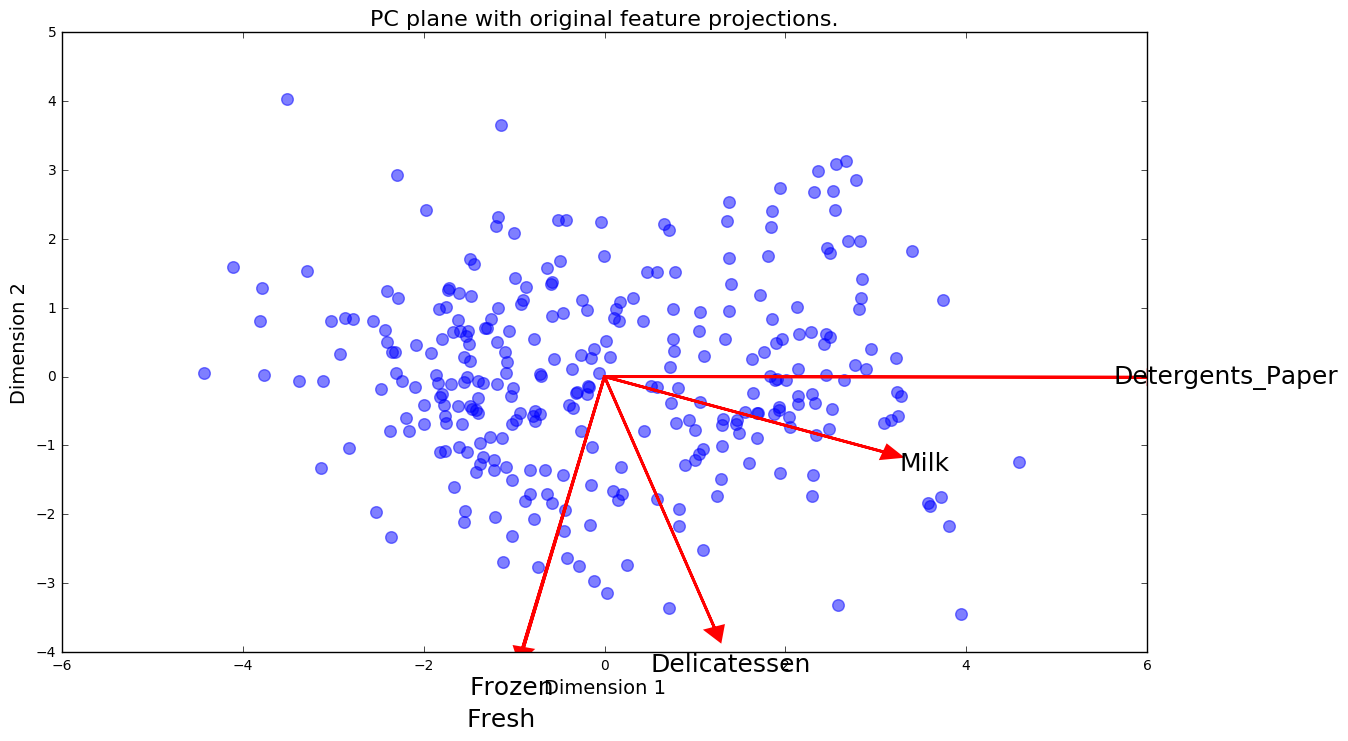

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of KMeans:
K-means is very simple to implement and run.Its average complexity is O(k n T) which is very fast.It works good if clusters are spherical or in most cases it can be used as a pre-clustering algorithm in order to get good compact clusters and then run a clustering algorithm on it later.

Advantages of Gaussian Mixture model(GMM):

GMM is a lot more flexible in terms of cluster covariance
k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. This implies that a point will get assigned only to the cluster closest to it. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans. As a result, cluster assignment is much more flexible in GMM than in k-means.

I would use the Gaussian Mixure Model because its easy to fit GMM and is more flexible than KMeans.

GMM model accommodates mixed membership

Another implication of its covariance structure is that GMM allows for mixed membership of points to clusters. In kmeans, a point belongs to one and only one cluster, whereas in GMM a point belongs to each cluster to a different degree. The degree is based on the probability of the point being generated from each cluster’s (multivariate) normal distribution, with cluster center as the distribution’s mean and cluster covariance as its covariance. 

My task involves overlapping clusters because the data shows that my data points can have three or four common features being exhibited and therefore making clusters that do not overlap sort of make us loose that information.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score


clusterer = mixture.GMM(n_components=2).fit(reduced_data)


# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
#print score,', number of clusters used: ',i
print score

0.438299855911


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
I tried for clusters in the range 2 to 10 and the scores are as follows:
```
0.438299855911  component:  2
0.352002791502  component:  3
0.308654463218  component:  4
0.300588650852  component:  5
0.316220300154  component:  6
0.294640981737  component:  7
0.332359012126  component:  8
0.193129010387  component:  9
0.220237789664  component:  10
```
Best silhouette score is for 2 components

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

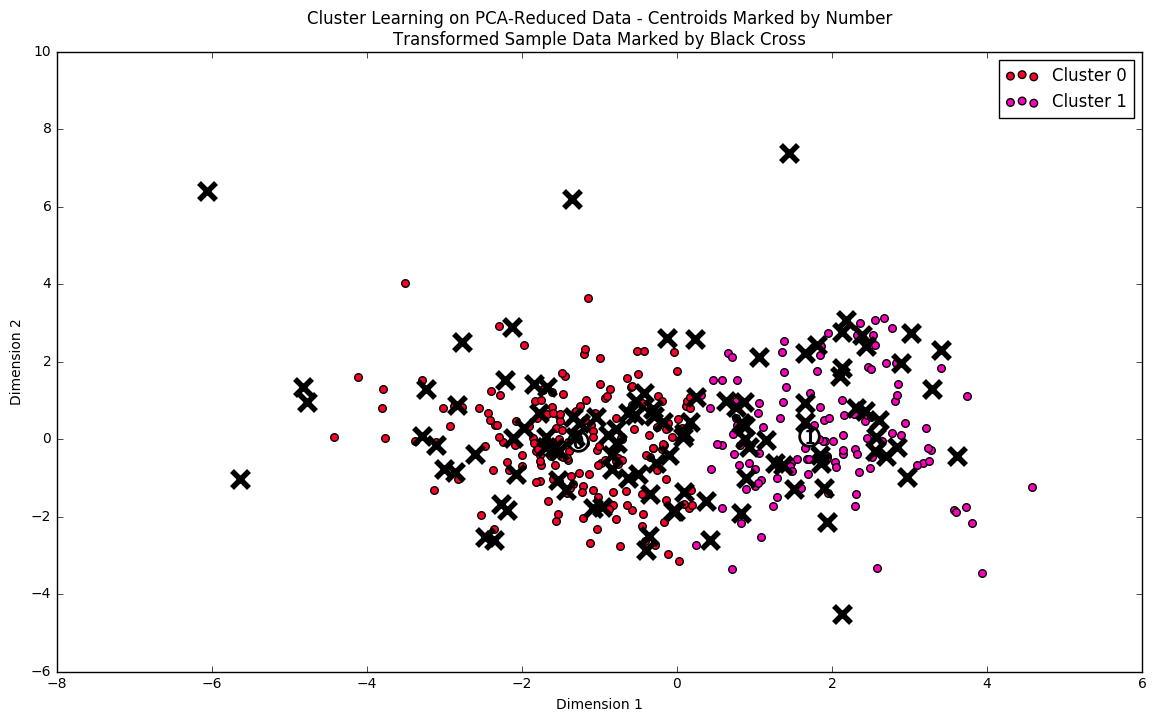

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data,preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]

true_centers = pd.DataFrame(np.round(true_centers), columns = new_data.keys())
true_centers.index = segments
display(true_centers)


Fresh    Milk  Frozen  Detergents_Paper  Delicatessen
Segment 0  9287.0  1893.0  2014.0             304.0         745.0
Segment 1  5572.0  6929.0  1273.0            3948.0        1167.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 people would represent  a well to do establishment somewhat of an urban area they have retail stores and supermarkets near them.

Segment 1 people may represent people who live in a area with both retail stores and supermarkets because they do not lack Detergents_Paper.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

    


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 0
Sample point 5 predicted to be in Cluster 0
Sample point 6 predicted to be in Cluster 0
Sample point 7 predicted to be in Cluster 1
Sample point 8 predicted to be in Cluster 0
Sample point 9 predicted to be in Cluster 0
Sample point 10 predicted to be in Cluster 0
Sample point 11 predicted to be in Cluster 0
Sample point 12 predicted to be in Cluster 1
Sample point 13 predicted to be in Cluster 0
Sample point 14 predicted to be in Cluster 1
Sample point 15 predicted to be in Cluster 0
Sample point 16 predicted to be in Cluster 1
Sample point 17 predicted to be in Cluster 1
Sample point 18 predicted to be in Cluster 0
Sample point 19 predicted to be in Cluster 0
Sample point 20 predicted to be in Cluster 1
Sample point 21 predicted to be in Cluster 0
Sample point 22 pred

**Answer:**
Yes they are let us take sample 107 and 109 for example for 107 we have data like dimesion1->2.4436,dimension2->2.4030.Which says its distributed along the positive side of PC1 and PC2. Which mean along Detergents_Paper so it must go to segment 1 and it has gone similary for 109 we have dimension1->-0.7779,dimension2->-0.1116.Which shows that it decrease along positive PC1 and PC2 therefore it got classified into segment 0 which is correct.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Running A/B test can happen in such a manner -Take 2 large samples from the same population that are almost equal in all respects (sample size>30) and then try your method (Test A) reduce for all on one population and try the solution below (Test B) for another population and check for which you receive more positive feedback.
Here in this problem we have already seent test A being run and the response was negative so we can try running test B.

Delivery service delay for people belonging to segment 0 will not be of much problem as they are having adequate resources near them but it can affect Segment 1 people because they are in need of this delivery service as they are in need of items that are not available to them nearby like Detergents_Paper.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

I think target variable should be the customer segment they belong to. 
So we can apply a simple linear regression on the customer segment data with estimated product spending as weights and then let it train on our previous data and then classify the points accordingly.(Use linear regression as we can separate the two distinct clusters).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

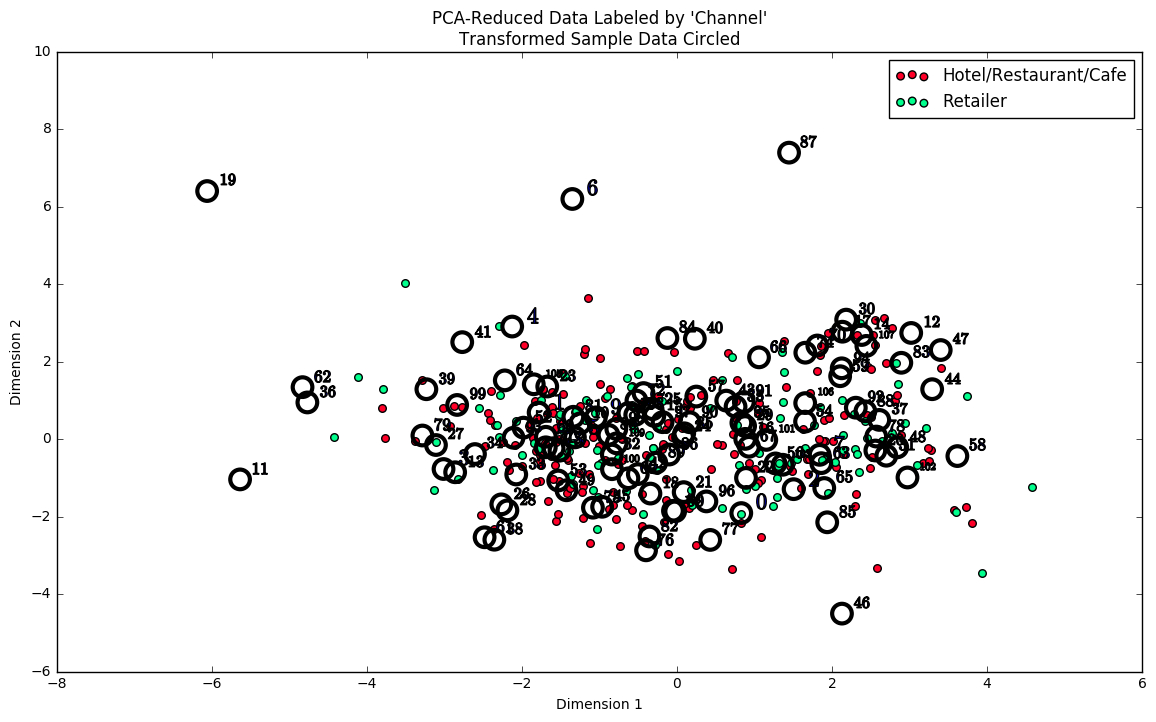

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm and the number of clusters correctly identified that customer segments based on retail shops which is same as what happens here in essence.We can clearly make this distinction.Yes there are customer segments that could be classified in such a manner if you take a look at both graph the one above and the last which showed two clusters see the red color dots in both graphs if the color is still red in both graphs for the same point it means it is purely retailer and you can follow this analogy keeping pink up and green down.Yes I find these totally consistent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.